In [1]:
!python --version

Python 3.10.12


In [2]:
# If executed from Google Colab
# !git clone https://github.com/jesusBV20/MRS-SS_souce_seeking.git
# !rsync -a MRS-SS_souce_seeking/ .
# !rm -r MRS-SS_souce_seeking

Cloning into 'MRS-SS_souce_seeking'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), 13.25 KiB | 4.42 MiB/s, done.


In [ ]:
# If you want to use latex with matplotlib
# !apt install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super
# !pip install -y latex

# Libraries and global variables

In [1]:
# ----------------------------------------------------------------------
# Import main libraries
# ----------------------------------------------------------------------

import numpy as np
from numpy import linalg as la

# Graphic tools
import matplotlib.pyplot as plt
import matplotlib

# Animation tools
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython.display import HTML

# Source Seeking Tools
from SS_tools.toolbox import *
from SS_tools.scalar_field import *

from SS_tools.simulations import *

from SS_tools.plot_article import *
from SS_tools.plot_simulations import *

# ----------------------------------------------------------------------
# General configuration
# ----------------------------------------------------------------------

# Fix the random seed
np.random.seed(2023)

# Tell matplotlib to use latex
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = False

# Fix font size
font_params = {'size' : 14}
matplotlib.rc('font', **font_params)

---
# The Ascending Direction

## Lemma 1: 

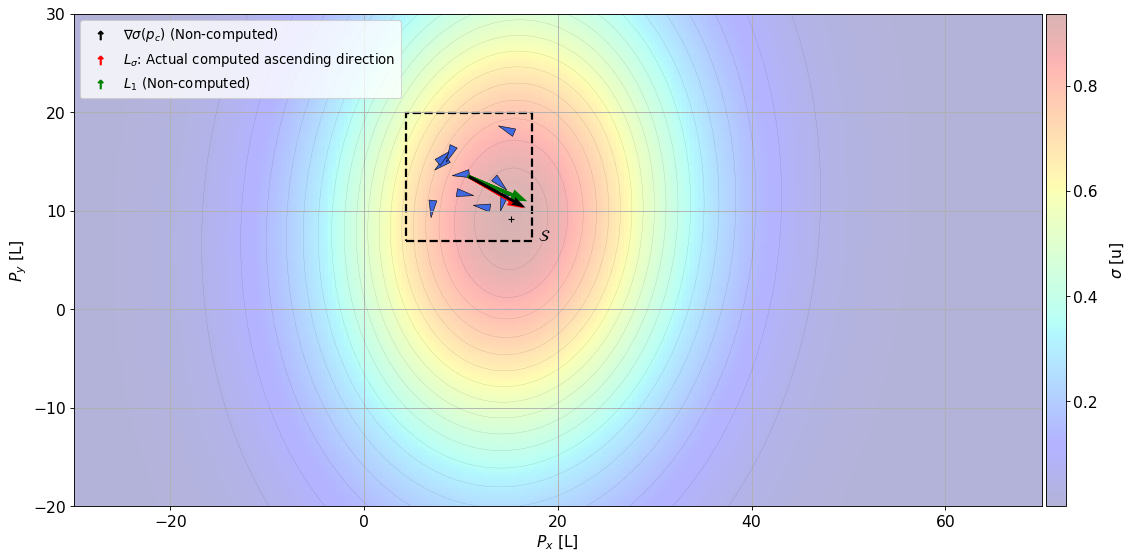

In [8]:
# Parameters --
N = 10
l1, l2 = 10, 10

# Scalar field
mu0 = np.array([16,10]) 

# ----------------------------------------------------------------------
# Generating the scalar field
# ----------------------------------------------------------------------
max_int = 100
mu = mu0 + 6 * (np.random.rand() - 0.5)
dev = 40 + 20 * (np.random.rand() - 0.5)

psi = np.pi * np.random.rand()
a, b = 1 + 5*(np.random.rand()+1), 1 + 3*(np.random.rand()+1)

# Generating...
S = -np.array([[a,0],[0,b]])
R =  M_rot(psi)
R2 = M_rot(psi)

sigma_func = sigma_gauss(mu=mu, max_intensity=max_int, dev=dev, S=S, R=R)
sigma_test = sigma(sigma_func)
sigma_test.rot = R2

# ----------------------------------------------------------------------
# Generate the formation
# ----------------------------------------------------------------------
phi = 2 * np.pi * np.random.rand(N)
p0 = mu0 + 40 * (np.random.rand(2) - 0.5)
px = p0[0] + l1 * (np.random.rand(N) - 0.5)
py = p0[1] + l2 * (np.random.rand(N) - 0.5)

P = np.array([px,py]).T
pc = np.sum(P, axis=0)/N

sigma_values = sigma_test.value(P)

# Compute L_sigma
l_sigma = L_sigma(P - pc, sigma_values)
l_sigma = l_sigma/np.sqrt(l_sigma[0]**2 + l_sigma[1]**2)

# Compute L_sigma^1
l1_vec = sigma_test.draw_L1(pc, P)
l1_vec = l1_vec/np.sqrt(l1_vec[0]**2 + l1_vec[1]**2)

# ----------------------------------------------------------------------
# Plotting
# ----------------------------------------------------------------------
# Generate the plot
fig = plt.figure(figsize=(16, 8), dpi=80)
ax = fig.subplots()

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax, xlim=60, ylim=40, n=300, contour_levels=20)

# Axis configuration
ax.set_xlim([-30,70])
ax.set_ylim([-20,30])
ax.set_xlabel(r"$P_x$ [L]")
ax.set_ylabel(r"$P_y$ [L]")
ax.grid(True)

# Draw the agents
for n in range(N):
    icon = unicycle_patch([px[n], py[n]], phi[n], "royalblue", **KW_PATCH)
    ax.add_patch(icon)

# Plot S region
plot_sregion(ax, pc, l1, l2)

# Draw the gradient at pc, L^1 and L
sigma_test.draw_grad(pc, ax, width=0.003, scale=15)
vector2d(ax, pc, l_sigma*6, c="red"  , **KW_ARROW)
vector2d(ax, pc, l1_vec *6, c="green", **KW_ARROW)

# Generate the legend
arr1 = plt.scatter([],[],c='k'  ,marker=r'$\uparrow$',s=60)
arr2 = plt.scatter([],[],c='red',marker=r'$\uparrow$',s=60)
arr3 = plt.scatter([],[],c='green',marker=r'$\uparrow$',s=60)

leg = Legend(ax, [arr1, arr2, arr3], 
             [r"$\nabla \sigma (p_c)$ (Non-computed)",
              r"$L_{\sigma}$: Actual computed ascending direction",
              r"$L_1$ (Non-computed)"],
            loc="upper left", prop={'size': 12})

ax.add_artist(leg)

# Labels with the sigma measured
#for i in range(N):
#    ax.text(P[i,0]-1.5, P[i,1]+0.7, "{0:.2f}".format(sigma_values[i]))

 # Show the plot!
plt.show()

## Collorary 1:

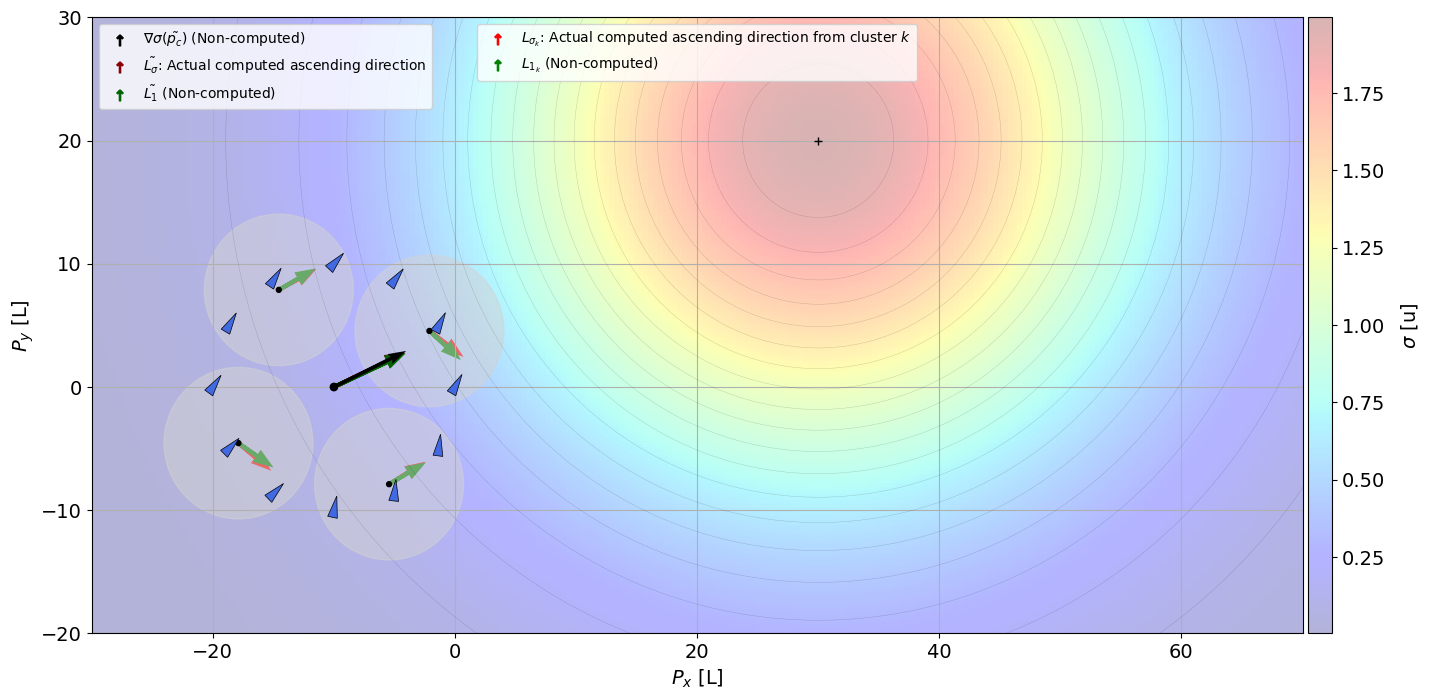

In [3]:
# Parameters --
clusters = [
    cluster(np.array([
        [5, 6], [3, 4.8], [4, 4], [4, 7], [3.5, 6], [3.8, 5], [2.3, 5.8]
        ])),
    cluster(np.array([
        [6.5, 1], [7, 1.5], [7.5, 2.5], [6.2, 2.1], [7, 2.2], [6.6, 2.3]
        ])),
    cluster(np.array([
        [8, 6], [7.5, 7], [8.5, 8], [8.4, 6.2], [9, 6.6], [8.7, 7.3]
        ]))
]

# Center and radius of the decagon
center = np.array([-10, 0])
radius = 10

# Angles between each point
angles = np.linspace(0, 2*np.pi, 12, endpoint=False)

# ----------------------------------------------------------------------
# Generating the scalar field
# ----------------------------------------------------------------------

sigma_func = sigma_gauss(mu=[30,20], max_intensity=100, dev=20)
sigma_test = sigma(sigma_func)

# ----------------------------------------------------------------------
# Generate the formation
# ----------------------------------------------------------------------

# Calculate the x and y coordinates of each point
x_coords = center[0] + radius * np.cos(angles)
y_coords = center[1] + radius * np.sin(angles)

# Combine the x and y coordinates into a single array
deca = np.column_stack((x_coords, y_coords))

clusters_deca = [
    cluster(deca[6:9]),
    cluster(deca[0:3]),
    cluster(deca[9:12]),
    cluster(deca[3:6])
]

# ------------------------------
# Calling the plotting function
# ------------------------------
clusters_plot(clusters_deca, sigma_test)

# Sensibility and Observability

## Proposition 2

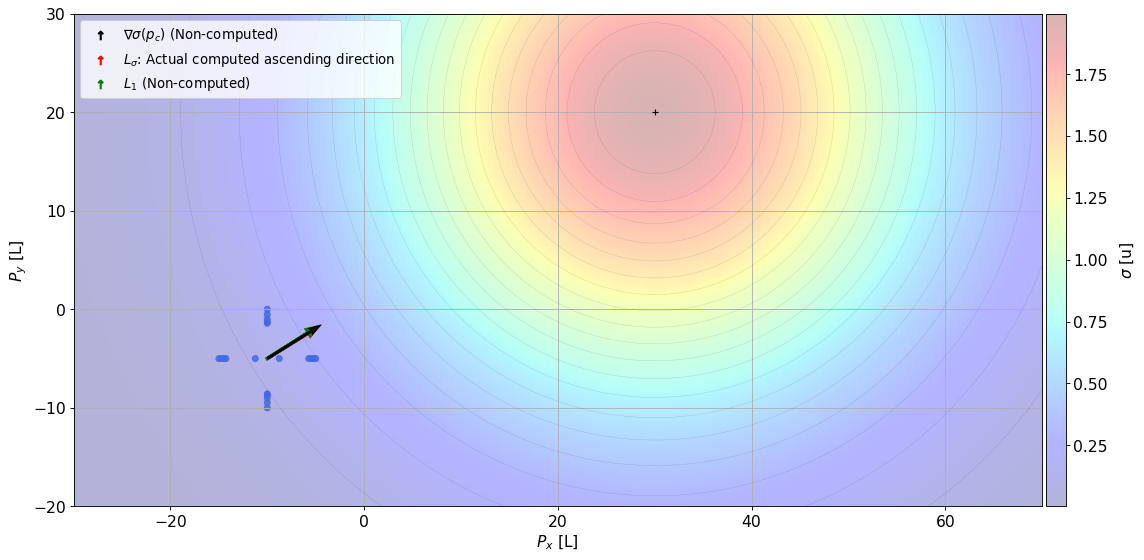

In [6]:
# Parameters --
p0 = np.array([-10,-5])

nx, ny = 10, 10
a1, a2 = 0.9, 0.8
lx, ly = 5, 5

# ----------------------------------------------------------------------
# Generating the scalar field
# ----------------------------------------------------------------------

sigma_func = sigma_gauss(mu=[30,20], max_intensity=100, dev=20)
sigma_test = sigma(sigma_func)

# ----------------------------------------------------------------------
# Generate the formation
# ----------------------------------------------------------------------
a_x1d = calculate_a(nx, a1)
a_y1d = calculate_a(ny, a2)

P_x = a_x1d.reshape(1, np.size(a_x1d))
P_x = np.vstack((a_x1d*lx, np.zeros((1, np.size(a_x1d)))))

P_y = a_y1d.reshape(1, np.size(a_y1d))
P_y = np.vstack((np.zeros((1, np.size(a_y1d))), a_y1d*ly))

P = np.hstack((P_x,P_y)).T + p0
pc = np.mean(P, axis=0)

# Compute the measured sigma values
sigma_values = sigma_test.value(P)

# Compute L_sigma
l_sigma = L_sigma(P - pc, sigma_values)
l_sigma = l_sigma/np.sqrt(l_sigma[0]**2 + l_sigma[1]**2)

# Compute L_sigma^1
l1_vec = sigma_test.draw_L1(pc, P)
l1_vec = l1_vec/np.sqrt(l1_vec[0]**2 + l1_vec[1]**2)

# ----------------------------------------------------------------------
# Plotting
# ----------------------------------------------------------------------

# Generate the plot
fig = plt.figure(figsize=(16, 8), dpi=80)
ax = fig.subplots()

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax, xlim=60, ylim=40, n=300, contour_levels=20)

# Axis configuration
ax.set_xlim([-30,70])
ax.set_ylim([-20,30])
ax.set_xlabel(r"$P_x$ [L]")
ax.set_ylabel(r"$P_y$ [L]")
ax.grid(True)

# Draw the agents
for n in range(nx + ny):
    ax.add_patch(plt.Circle(P[n], 0.3, color="royalblue", alpha=0.8))

# Draw the gradient at pc, L^1 and L
sigma_test.draw_grad(pc, ax, width=0.003, scale=15)
vector2d(ax, pc, l_sigma*6, c="red"  , **KW_ARROW)
vector2d(ax, pc, l1_vec *6, c="green", **KW_ARROW)

# Generate the legend
arr1 = plt.scatter([],[],c='k'  ,marker=r'$\uparrow$',s=60)
arr2 = plt.scatter([],[],c='red',marker=r'$\uparrow$',s=60)
arr3 = plt.scatter([],[],c='green',marker=r'$\uparrow$',s=60)

leg = Legend(ax, [arr1, arr2, arr3], 
             [r"$\nabla \sigma (p_c)$ (Non-computed)",
              r"$L_{\sigma}$: Actual computed ascending direction",
              r"$L_1$ (Non-computed)"],
            loc="upper left", prop={'size': 12})
ax.add_artist(leg)

# Show the plot!
plt.show()

## Lemma 4

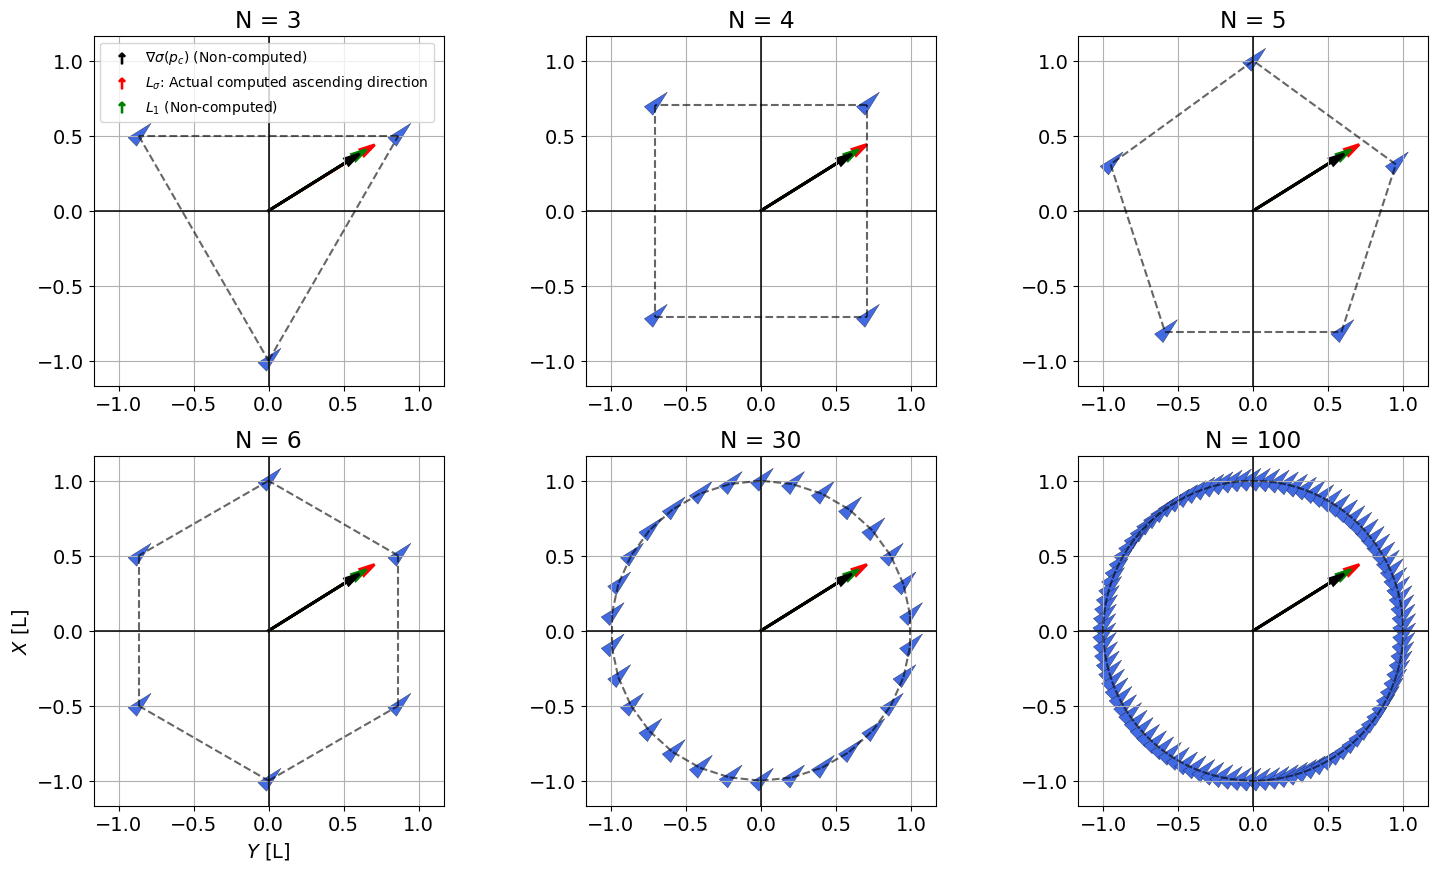

In [4]:
# Parameters --
r = 1

# ----------------------------------------------------------------------
# Plotting
# ----------------------------------------------------------------------
fig = plt.figure(figsize=(18, 10), dpi=100)
ax  = fig.subplots(2,3)

plot_polyreg(ax[0,0],3,r,legend=True)
plot_polyreg(ax[0,1],4,r)
plot_polyreg(ax[0,2],5,r)
plot_polyreg(ax[1,0],6,r,xlab=True,ylab=True)
plot_polyreg(ax[1,1],30,r)
plot_polyreg(ax[1,2],100,r)

# Show the plot!
plt.show()

## Proposition 3

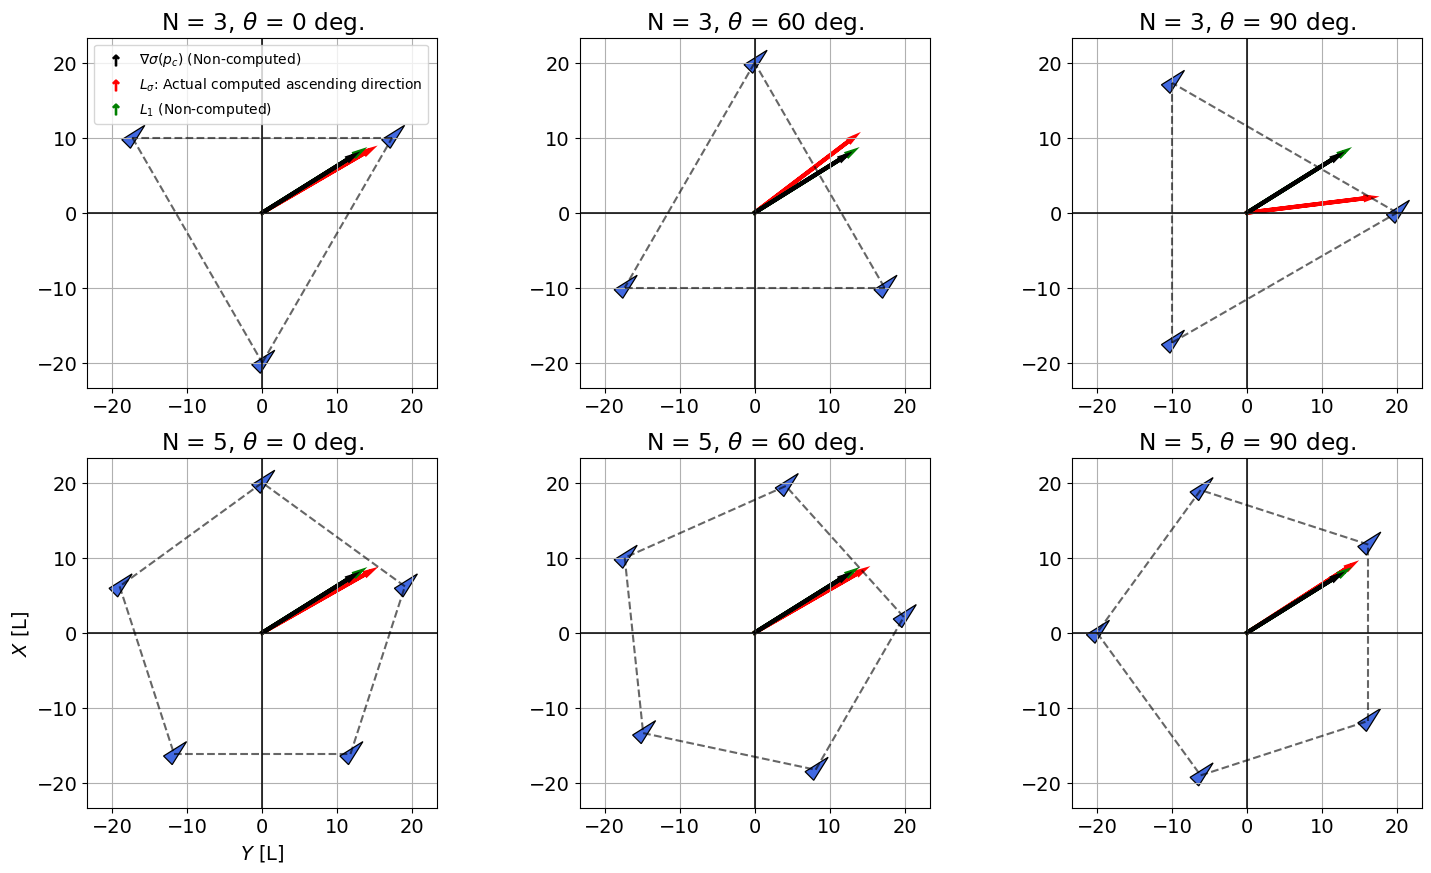

In [2]:
# Parameters --
N1, N2 = 3, 5
r = 20

rt_ang = [0, np.pi/3, np.pi/2]

# ----------------------------------------------------------------------
# Plotting
# ----------------------------------------------------------------------
fig = plt.figure(figsize=(18, 10), dpi=100)
ax  = fig.subplots(2,3)

plot_polyreg(ax[0,0],N1,r,rt_ang[0],title_full=True,legend=True)
plot_polyreg(ax[0,1],N1,r,rt_ang[1],title_full=True)
plot_polyreg(ax[0,2],N1,r,rt_ang[2],title_full=True)
plot_polyreg(ax[1,0],N2,r,rt_ang[0],title_full=True,xlab=True,ylab=True)
plot_polyreg(ax[1,1],N2,r,rt_ang[1],title_full=True)
plot_polyreg(ax[1,2],N2,r,rt_ang[2],title_full=True)

# Show the plot!
plt.show()

## Proposition 4

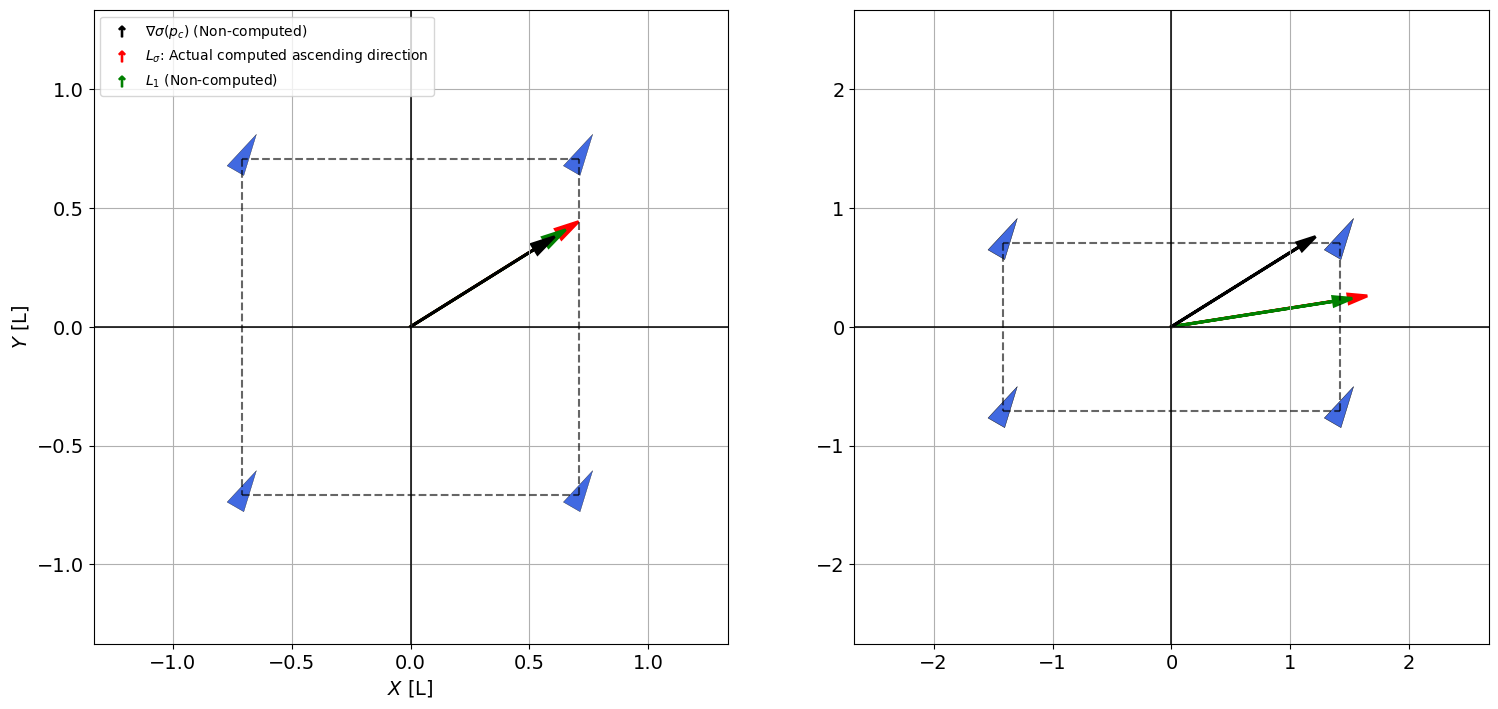

In [2]:
# Parameters --
lx = [2, 4]
ly = [2, 2]

# ----------------------------------------------------------------------
# Plotting
# ----------------------------------------------------------------------
fig = plt.figure(figsize=(18, 10), dpi=100)
ax  = fig.subplots(1,2)

plot_rect(ax[0],lx[0],ly[0],legend=True,xlab=True,ylab=True)
plot_rect(ax[1],lx[1],ly[1])

# Show the plot!
plt.show()


## Proposition 5-6

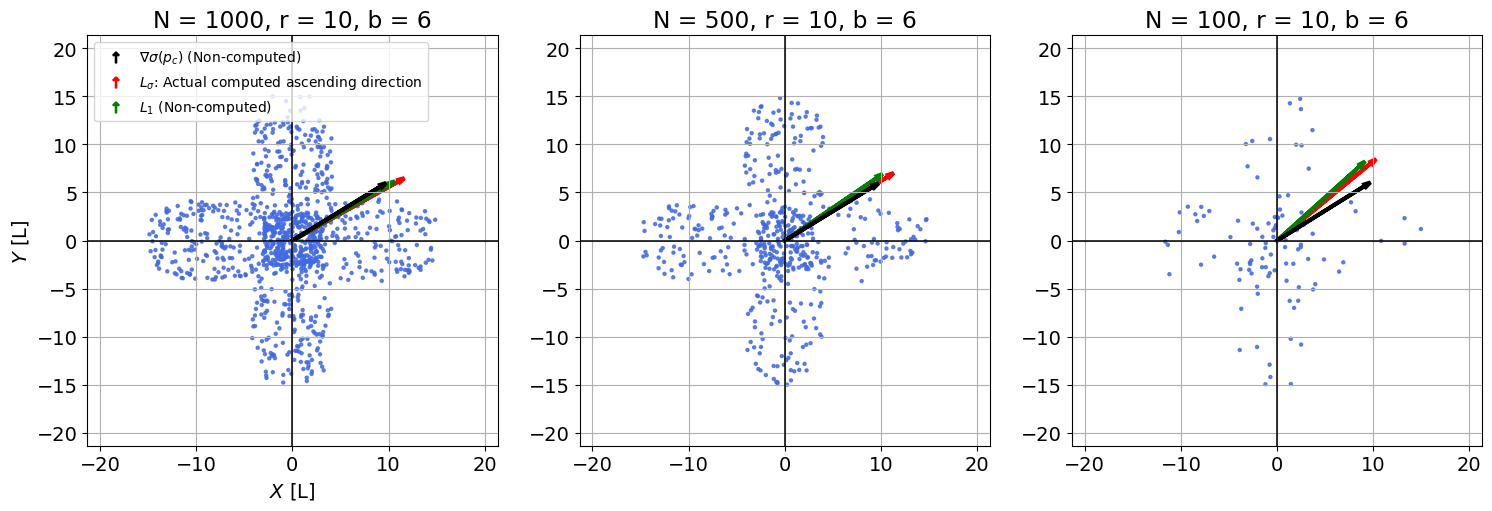

In [2]:
# Parameters --
N = [1000, 500, 100]
r = [10,10,10]
b = [6,6,6]

# ----------------------------------------------------------------------
# Plotting
# ----------------------------------------------------------------------
fig = plt.figure(figsize=(18, 10), dpi=100)
ax  = fig.subplots(1,3)

plot_flower(ax[0],N[0],r[0],b=b[0],legend=True,xlab=True,ylab=True)
plot_flower(ax[1],N[1],r[1],b=b[1])
plot_flower(ax[2],N[2],r[2],b=b[2])

# Show the plot!
plt.show()

## Batman

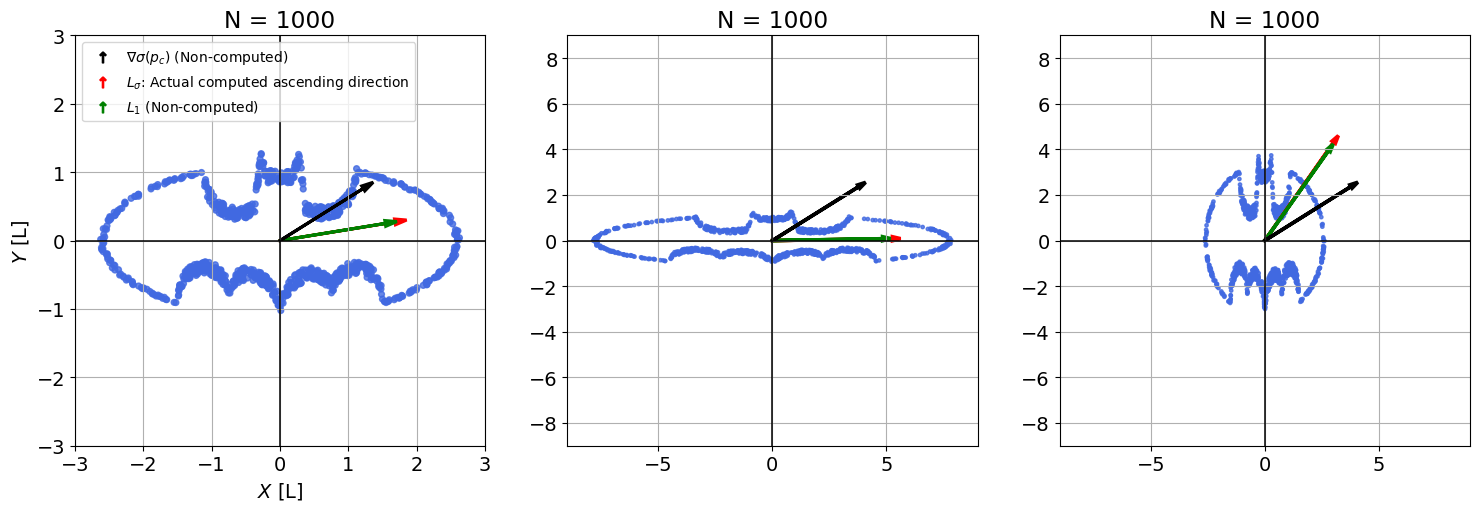

In [15]:
# Parameters --
N = 1000
lims = [[3,3], [9,3], [3,9]]
# ----------------------------------------------------------------------
# Plotting
# ----------------------------------------------------------------------
fig = plt.figure(figsize=(18, 10), dpi=100)
ax  = fig.subplots(1,3)

plot_batman(ax[0],N,lims[0],legend=True,xlab=True,ylab=True)
plot_batman(ax[1],N,lims[1])
plot_batman(ax[2],N,lims[2])

# Show the plot!
plt.show()

# Displacement-based formation control

---
# Source Seeking Simulations

## Simulation Class 1: *Un único cluster que modifica su forma y número de agentes*

Caracterísitcas de la misión:

* Contamos con un único enjambre.
* Podremos generar N agentes distribuidos de distintas formas entorno a un centroide.
* El enjambre podrá modificar su forma a lo largo de la simulación.
* Se podrán añadir y eliminar agentes del enjambre durange la simulación. #TODO

### **SIM 1**: N = 200 | Unos agentes mueren y otros se incorporan

In [2]:
# ----------------------------------------------------------------------
# Generating the scalar field
# ----------------------------------------------------------------------
n = 2
max_int = 20
mu = [40,40]
dev = 10

sigma_func = sigma_nonconvex(k=0.04, dev=dev, mu=mu)
sigma_field = sigma(sigma_func)

# ----------------------------------------------------------------------
# Simulation parameters
# ----------------------------------------------------------------------
dt = 0.1
t0 = 0
t_sim_final = 60

# Number of agents and initial states of the agents
n_agents = 200
rc0 = [-35, -50]
lims = [10, 5]
border_noise = 0.6

n_new = 15
rc0_new  = [10, -20]
lims_new = [10 , 0.5]

p0_new = XY_distrib(n_new, n, rc0_new, lims_new)
p0 = XY_distrib(n_agents - n_new, n, rc0, lims, border_noise)
p0 = np.vstack((p0_new, p0))
v0 = 3

active0 = np.ones(n_agents, dtype=bool)
active0[0:n_new] = False

In [3]:
# ----------------------------------------------------------------------
# Simulación numérica
# ----------------------------------------------------------------------

# Inicializamos la simulación
sim = simulation_class1(sigma_field, n_agents, [t0, p0, v0, active0], dt)

# Initialize the data collector
data_labels = ["pf", "rc", "e", "d", "sigma", "active", "l_sigma", 
               "rc_grad", "field_rot"]
data_col = data_collector(sim, data_labels)
data_col.collect()

# Configuración de la conexión y desconexión
t1 = 20
act_distance = np.ones(n_new+1) * 13 + (np.random.rand(n_new+1) - 0.5)*2

# Realizamos toda la simulación mumerica
while (data_col.get("tf") < t_sim_final - dt/10): # - dt/10 to avoid round-off errors

  # Desconexión de 20 agentes
  if (data_col.get("tf") >= t1) and (data_col.get("tf") <= t1+1):
    sim.active[n_new+1 : n_new+22] = False

  # Activación de agentes
  for i in range(n_new+1):
    if (data_col.get("d")[-1,i] <= act_distance[i]) and not sim.active[i]:
      sim.active[i] = True

  # Integrate new step
  sim.int_step()
  data_col.collect()

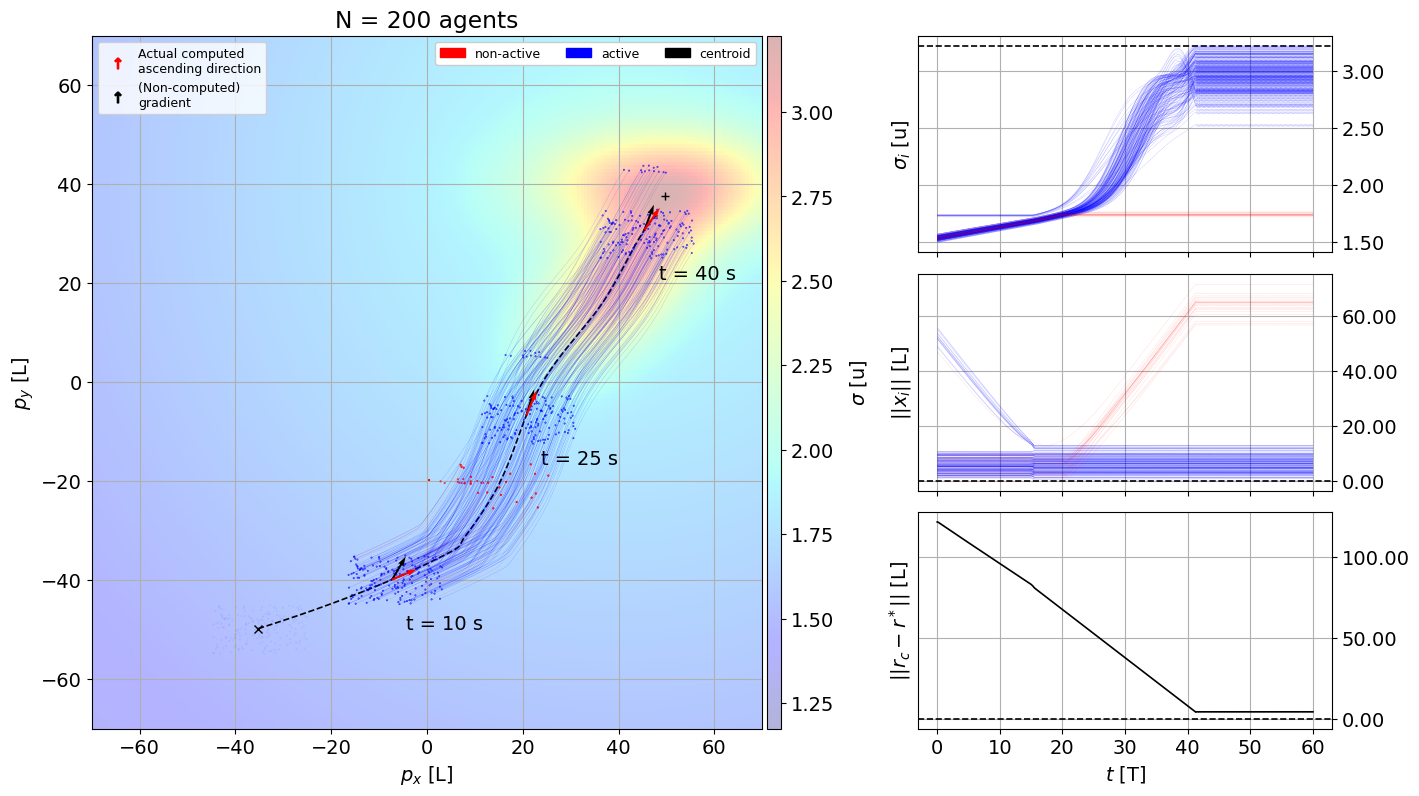

In [4]:
# ----------------------------------------------------------------------
# Plot few steps of the simulation
# ----------------------------------------------------------------------
plot_class1(data_col, sim, t_list=[10,25,40])

In [5]:
# ----------------------------------------------------------------------
# Animate the simulation
# ----------------------------------------------------------------------
anim = anim_class1(data_col, sim, anim_tf=1)
HTML(anim.to_html5_video()) # It takes a looot of time...

Simulando 11 frames... 
Estado:
tf =  0.00 | 0.00%
tf =  0.00 | 0.00%
tf =  0.10 | 10.00%
tf =  0.20 | 20.00%
tf =  0.30 | 30.00%
tf =  0.40 | 40.00%
tf =  0.50 | 50.00%
tf =  0.60 | 60.00%
tf =  0.70 | 70.00%
tf =  0.80 | 80.00%
tf =  0.90 | 90.00%
tf =  1.00 | 100.00%


### **SIM 2**: N = 200 | La formación cambia para evitar un obstáculo

In [6]:
# ----------------------------------------------------------------------
# Generamos el campo escalar
# ----------------------------------------------------------------------
n = 2
max_int = 20
mu = [40,40]
dev = 10

sigma_func  = sigma_gauss(mu, max_intensity=max_int, dev=dev, n=n)
sigma_field = sigma(sigma_func)

# ----------------------------------------------------------------------
# Parámetros de la simulación
# ----------------------------------------------------------------------
dt = 0.1
t0 = 0
t_sim_final = 105

# Obstáculos de la simulación
obstacles = [[0,5,10], [10,-30,5]]

# Estado inicial de los agentes y número de agentes
n_agents = 200
rc0 = [-35, -50]
r, h = 10, 2
lims = [15, 2]
border_noise = 0.6

p0_cir = circular_distrib(n_agents, n, [0,0], r, h, border_noise)
p0_sqr = XY_distrib(n_agents, n, [0,0], lims, border_noise)

p0 = rc0 + p0_cir
v0 = 1.5

In [7]:
# ----------------------------------------------------------------------
# Numerical simulation
# ----------------------------------------------------------------------

# Initialize the simulation
sim = simulation_class1(sigma_field, n_agents, [t0, p0, v0], dt, True, obstacles)

# Initialize the data collector
data_labels = ["pf", "rc", "e", "d", "sigma", "active", "l_sigma", 
               "rc_grad", "field_rot"]
data_col = data_collector(sim, data_labels)
data_col.collect()

# Execute numerical simulation
t1, t2 = 20, 43
while (sim.tf <= t_sim_final - dt/10):
  if (sim.tf >= t1) and (sim.tf <=t1+1):
    sim.Xd = p0_sqr
  if (sim.tf >= t2) and (sim.tf <=t2+1):
    sim.Xd = p0_cir

  # Integrate new step
  sim.int_step()
  data_col.collect()

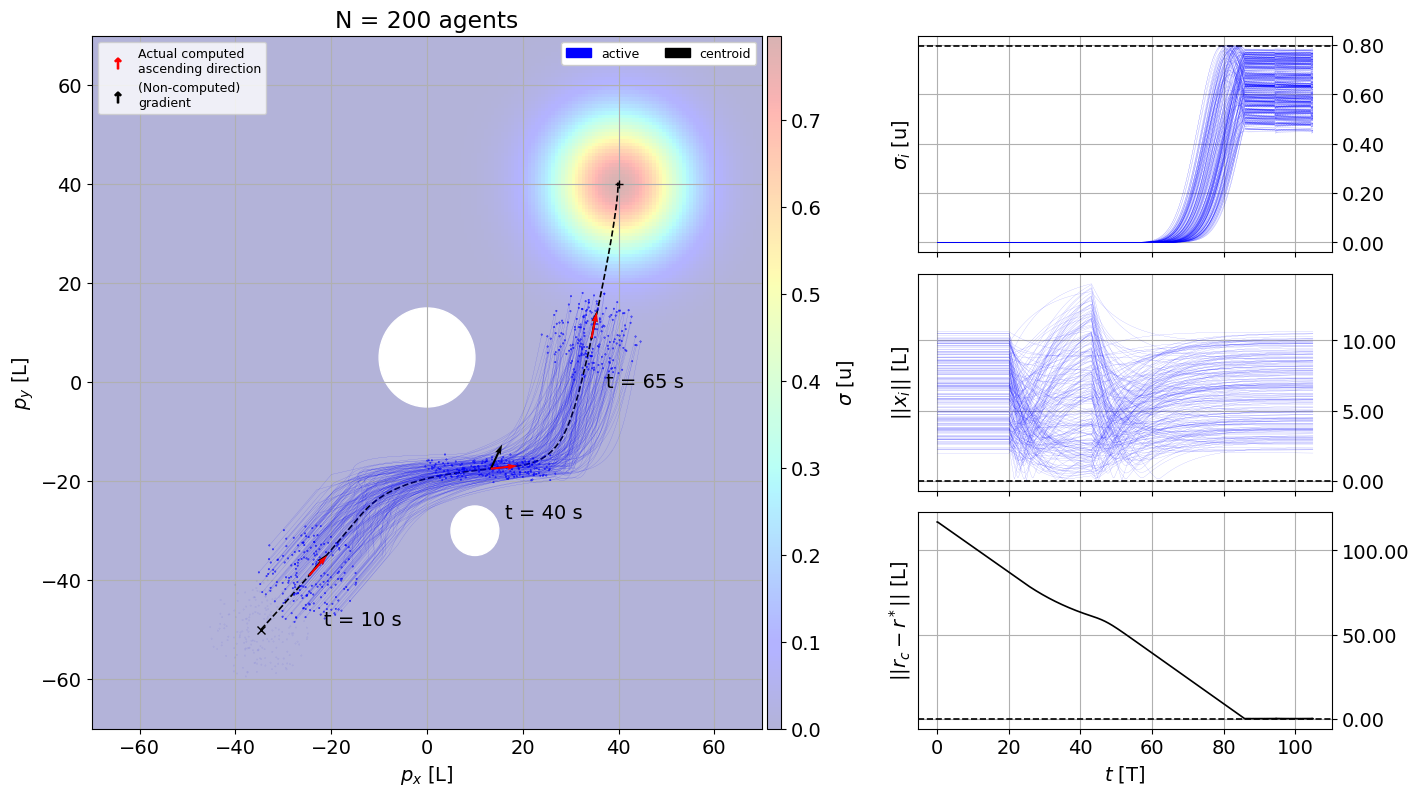

In [19]:
# ----------------------------------------------------------------------
# Plot few steps of the simulation
# ----------------------------------------------------------------------
plot_class1(data_col, sim, t_list=[10,40,65])

In [20]:
# ----------------------------------------------------------------------
# Animate the simulation
# ----------------------------------------------------------------------
anim = anim_class1(data_col, sim, anim_tf=90)
HTML(anim.to_html5_video()) # It takes a looot of time...

Simulando 901 frames... 
Estado:
tf =  0.00 | 0.00%
tf =  0.00 | 0.00%
tf =  9.00 | 10.00%
tf = 18.00 | 20.00%
tf = 27.00 | 30.00%
tf = 36.00 | 40.00%
tf = 45.00 | 50.00%
tf = 54.00 | 60.00%
tf = 63.00 | 70.00%
tf = 72.00 | 80.00%
tf = 81.00 | 90.00%
tf = 90.00 | 100.00%


### **SIM 3**: N = 200 | El enjambre rectangular rota
Una aproximación de Source Seeking a la maniobrabilidad de enjambres.

In [11]:
# ----------------------------------------------------------------------
# Maneuverability parameters
# ----------------------------------------------------------------------
limx, limy = 10, 2
psi = 45 * np.pi / 180
ab_ = 4

mu = [40,40]

# ----------------------------------------------------------------------
# Scalar field generation
# ----------------------------------------------------------------------
n = 2
max_int = 20
dev = 10

# Define the scalar field
S = -np.array([[1,0],[0,ab_]])
R = M_rot(psi)

sigma_func = sigma_gauss(mu=mu, max_intensity=max_int, dev=dev, S=S, R=R)
sigma_field = sigma(sigma_func)

# ----------------------------------------------------------------------
# Simulation parameters
# ----------------------------------------------------------------------
dt = 0.1
t0 = 0
t_sim_final = 100
n_agents = 200

# Generate different distributions
rc0 = [-35, -50]
border_noise = 0.6
lims = [limx, limy]
R45 = M_rot(-45 * np.pi/180)
R90 = M_rot(-90 * np.pi/180)

p1 = XY_distrib(n_agents, n, [0,0], lims, border_noise)
p2 = Q_prod_xi(R45,p1)
p3 = Q_prod_xi(R90,p1)

# Initial state of the agents and number of agent
p0 = rc0 + p2
v0 = 2

In [12]:
# ----------------------------------------------------------------------
# Numerical simulation
# ----------------------------------------------------------------------

# Initialize the simulation
sim = simulation_class1(sigma_field, n_agents, [t0, p0, v0], dt, True)

# Initialize the data collector
data_labels = ["pf", "rc", "e", "d", "sigma", "active", "l_sigma", 
               "rc_grad", "field_rot"]
data_col = data_collector(sim, data_labels)
data_col.collect()

# Execute numerical simulation
t1, t2 = 10, 30
while (sim.tf <= t_sim_final - dt/10):
  if (sim.tf >= t1) and (sim.tf <= t1+1):
    sim.Xd = p1
  if (sim.tf >= t2) and (sim.tf <= t2+1):
    sim.Xd = p3

  # Integrate new step
  sim.int_step()
  data_col.collect()

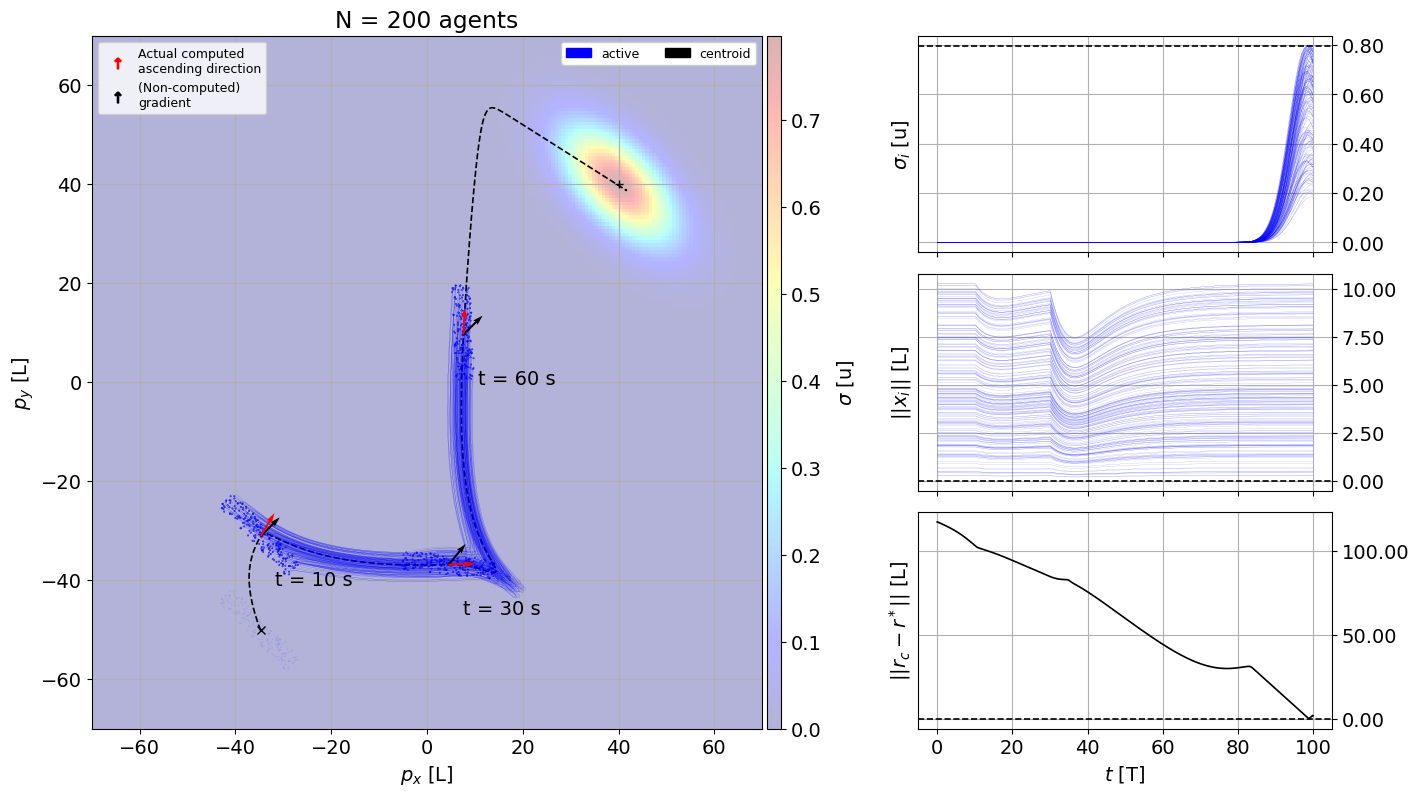

In [13]:
# ----------------------------------------------------------------------
# Plot few steps of the simulation
# ----------------------------------------------------------------------
plot_class1(data_col, sim, t_list=[10,30,60])

In [14]:
# ----------------------------------------------------------------------
# Animate the simulation
# ----------------------------------------------------------------------
anim = anim_class1(data_col, sim, anim_tf=100)
HTML(anim.to_html5_video()) # It takes a looot of time...

Simulando 1001 frames... 
Estado:
tf =  0.00 | 0.00%
tf =  0.00 | 0.00%
tf = 10.00 | 10.00%
tf = 20.00 | 20.00%
tf = 30.00 | 30.00%
tf = 40.00 | 40.00%
tf = 50.00 | 50.00%
tf = 60.00 | 60.00%
tf = 70.00 | 70.00%
tf = 80.00 | 80.00%
tf = 90.00 | 90.00%
tf = 100.00 | 100.00%


### **SIM 4**: N = 200 | El campo escalar rota
Una aproximación de Source Seeking a la maniobrabilidad de enjambres.

In [5]:
# Parámetros de maniobrabilidad
limx, limy = 10, 10
psi = -45 * np.pi / 180
ab_ = 4

mu = [40,40]

# ----------------------------------------------------------------------
# Generación del  campo escalar
# ----------------------------------------------------------------------
n = 2
max_int = 20
dev = 10

# Definimos el campo escalar
S = -np.array([[1,0],[0,ab_]])
R = M_rot(psi)

sigma_func = sigma_gauss(mu=mu, max_intensity=max_int, dev=dev, S=S, R=R)
sigma_field = sigma(sigma_func)

# ----------------------------------------------------------------------
# Parámetros de la simulación
# ----------------------------------------------------------------------
dt = 0.1
t0 = 0
t_sim_final = 60
n_agents = 150

# Generamos distintas distribuciones
rc0 = [-35, -50]
border_noise = 0.6
lims = [limx, limy]

p1 = XY_distrib(n_agents, n, [0,0], lims, border_noise)
p1 = batman_distrib(n_agents, [0,0], lims)

# Estado inicial de los agentes y número de agentes
p0 = rc0 + p1
v0 = 4

g:\Mi unidad\Workspace\source_seeking\MRS-SS_souce_seeking\SS_tools\toolbox.py:215: RuntimeWarning: invalid value encountered in sqrt
  eq1 = lambda x,y: ((x/7)**2 * np.sqrt(abs(abs(x)-3)/(abs(x)-3)) + (y/3)**2 * np.sqrt(abs(y+3/7*np.sqrt(33))/(y+3/7*np.sqrt(33))) - 1)
g:\Mi unidad\Workspace\source_seeking\MRS-SS_souce_seeking\SS_tools\toolbox.py:218: RuntimeWarning: invalid value encountered in sqrt
  eq4 = lambda x,y: (3*abs(x) + .75 * np.sqrt(abs((abs(x)-.75)*(abs(x)-.5)) / ((.75-abs(x))*(abs(x)-.5))) - y )


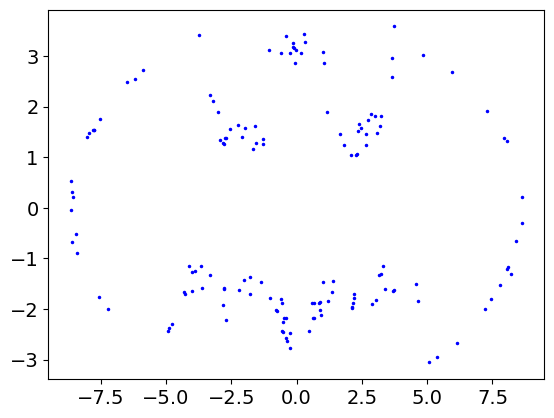

In [6]:
# Plot batman distribution :)
plt.plot(p1[:,0], p1[:,1], ".b", markersize=3)
plt.show()

In [8]:
# ----------------------------------------------------------------------
# Numerical simulation
# ----------------------------------------------------------------------

# Initialize the simulation
sim = simulation_class1(sigma_field, n_agents, [t0, p0, v0], dt, True)

# Initialize the data collector
data_labels = ["pf", "rc", "e", "d", "sigma", "active", "l_sigma", 
               "rc_grad", "field_rot"]
data_col = data_collector(sim, data_labels)
data_col.collect()

# Execute numerical simulation
w1 = 0.2  # Velocidad angular del campo escalar (rad/s)
w2 = 0.1
t1, t2, t3, t4 = 10, 15, 25, 50
while (sim.tf <= t_sim_final - dt/10):
  if ((sim.tf >= t1) and (sim.tf < t2)):
    rot = w1*(sim.tf-t1)
    sim.sigma_field.rot = M_rot(rot)
  if ((sim.tf >= t3) and (sim.tf < t4)):
    sim.sigma_field.rot = M_rot(rot + w2*(sim.tf-t3))

  # Integrate new step
  sim.int_step()
  data_col.collect()

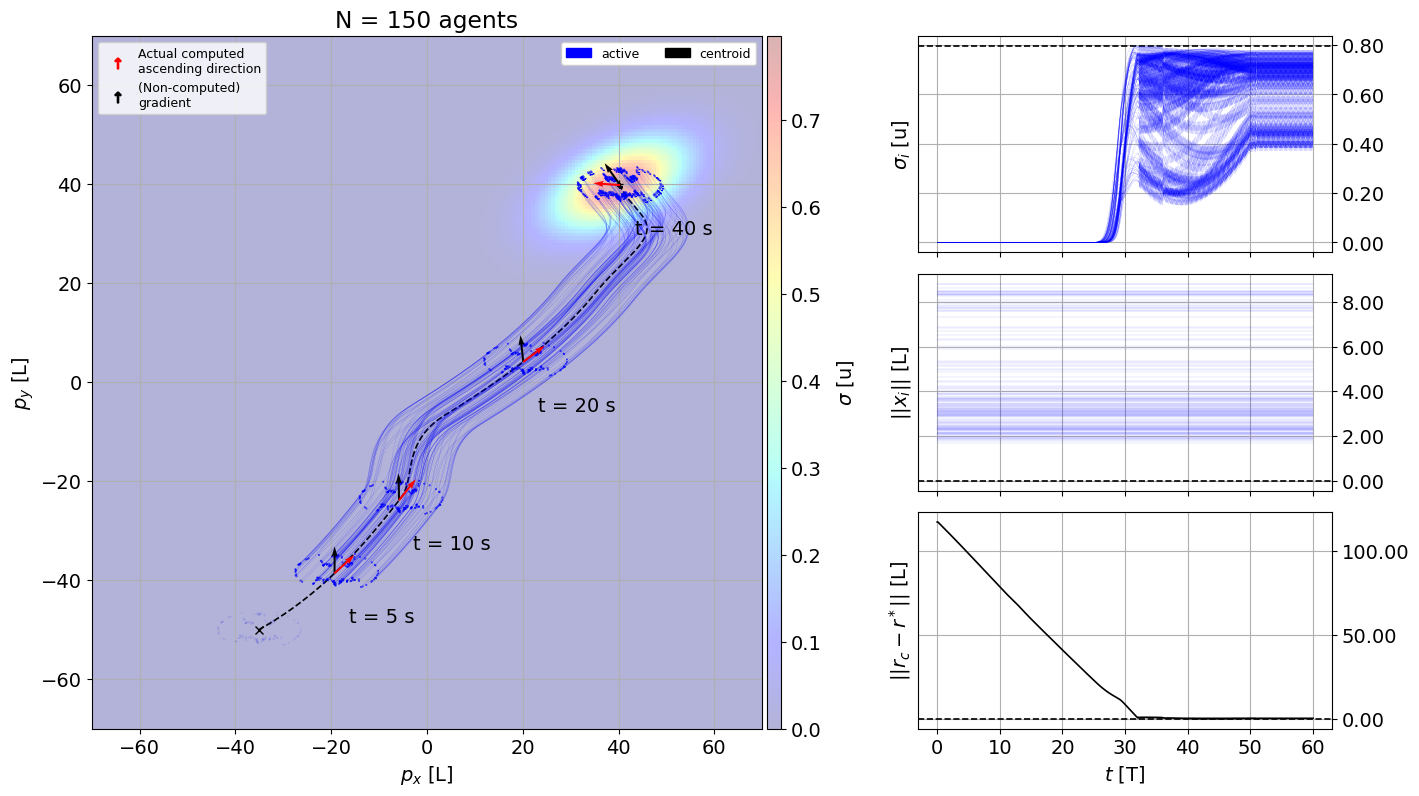

In [9]:
# ----------------------------------------------------------------------
# Plot few steps of the simulation
# ----------------------------------------------------------------------
plot_class1(data_col, sim, t_list=[5,10,20,40])

In [10]:
# ----------------------------------------------------------------------
# Animate the simulation
# ----------------------------------------------------------------------
anim = anim_class1(data_col, sim, anim_tf=35)
HTML(anim.to_html5_video()) # It takes a looot of time...

Simulando 351 frames... 
Estado:
tf =  0.00 | 0.00%
tf =  0.00 | 0.00%
tf =  3.50 | 10.00%
tf =  7.00 | 20.00%
tf = 10.50 | 30.00%
tf = 14.00 | 40.00%
tf = 17.50 | 50.00%
tf = 21.00 | 60.00%
tf = 24.50 | 70.00%
tf = 28.00 | 80.00%
tf = 31.50 | 90.00%
tf = 35.00 | 100.00%


## Simulation Class 2: Uniciclos en busca de la fuente

Similir a la simulación tipo 1, pero con dinámica de uniciclos

### **SIM 5**: Uniciclos en busca de la fuente

In [2]:
# ----------------------------------------------------------------------
# Generamos el campo escalar
# ----------------------------------------------------------------------
n = 2
max_int = 20
mu = [40,40]
dev = 10

sigma_func = sigma_nonconvex(k=0.04, dev=dev, mu=mu)
sigma_field = sigma(sigma_func)

# ----------------------------------------------------------------------
# Parámetros de la simulación
# ----------------------------------------------------------------------
dt = 0.2
t0 = 0
t_sim_final = 100

# Estado inicial de los agentes y número de agentes
n_agents = 20
rc0 = [-35, -50]
r, h = 10, 2
lims = [15, 2]
border_noise = 0.6

p0_cir = circular_distrib(n_agents, n, [0,0], r, h, border_noise)
p0_sqr = XY_distrib(n_agents, n, [0,0], lims, border_noise)

p0 = rc0 + p0_sqr
v0 = 2
phi0 = np.random.rand(n_agents) * np.pi

kd = 0.2

In [3]:
# ----------------------------------------------------------------------
# Numerical simulation
# ----------------------------------------------------------------------

# Initialize the simulation
sim = simulation_class2(sigma_field, n_agents, [t0, p0, v0, phi0], dt, kd)

# Initialize the data collector
data_labels = ["pf", "phif", "rc", "e", "d", "sigma", "omega", "l_sigma", "rc_grad"]
data_col = data_collector(sim, data_labels)
data_col.collect()

# Execute numerical simulation
while (sim.tf <= t_sim_final - dt/10):
  if (sim.tf >= 5) and (sim.tf <= 11):
    sim.Xd = p0_sqr

  # Integrate new step
  sim.int_step()
  data_col.collect()

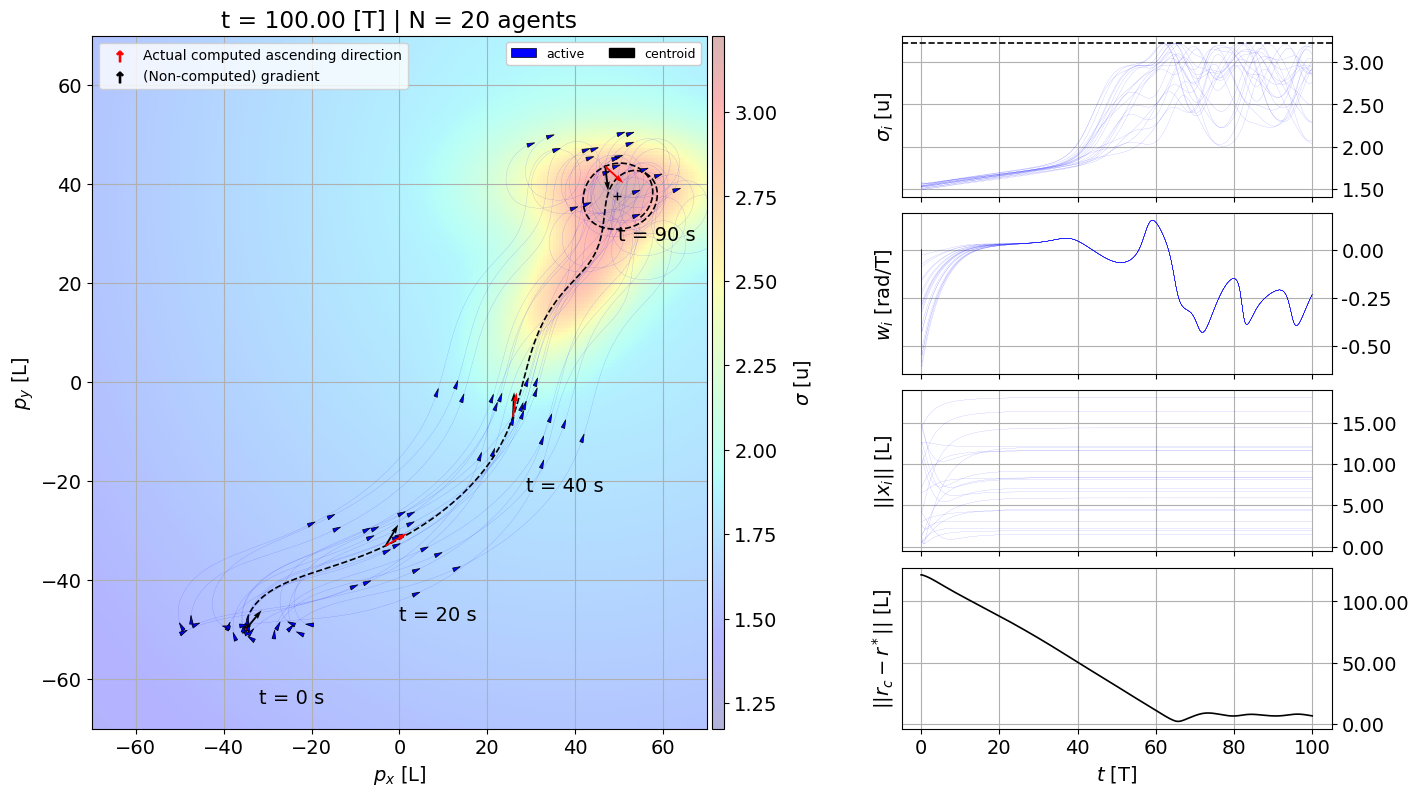

In [4]:
# ----------------------------------------------------------------------
# Plot few steps of the simulation
# ----------------------------------------------------------------------
plot_class2(data_col, sim, t_list=[0,20,40,90])

In [6]:
# ----------------------------------------------------------------------
# Animate the simulation
# ----------------------------------------------------------------------
anim = anim_class2(data_col, sim, anim_tf=90)
HTML(anim.to_html5_video()) # It takes a looot of time...

Simulando 451 frames... 
Estado:
tf =  0.00 | 0.00%
tf =  0.00 | 0.00%
tf =  9.00 | 10.00%
tf = 18.00 | 20.00%
tf = 27.00 | 30.00%
tf = 36.00 | 40.00%
tf = 45.00 | 50.00%
tf = 54.00 | 60.00%
tf = 63.00 | 70.00%
tf = 72.00 | 80.00%
tf = 81.00 | 90.00%
tf = 90.00 | 100.00%


### SIM 7: Simulación inifinita, aparecen clusters que mueren al llegar a la fuente